## Initial Data Exploration

The initial data exploration takes a look at the dataset. Since the Time and Amount are the only non-anonymised features, we plot them to gain better understanding of their spread. A count of the fraud and non-fraud cases is done and visualised using barplot. In order to visualise the correlations between features, a heatmap is plotted.

In [3]:
#importing packages

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
#loading data

df = pd.read_csv('../../data/creditcard.csv')

In [3]:
#shape of df

print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#data

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Users\homay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Attribute'}, xlabel='Time', ylabel='Density'>

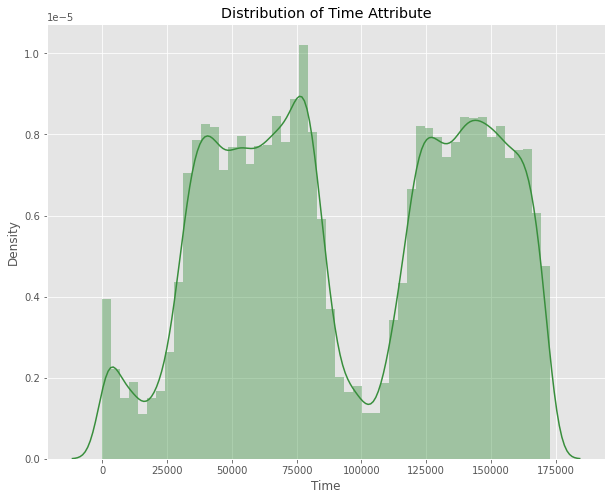

In [7]:
#visualizations of time and amount

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Attribute')
sns.distplot(df.Time, hist=True,color='#388E3C')

C:\Users\homay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Amount Attribute Distribution'}, xlabel='Amount', ylabel='Density'>

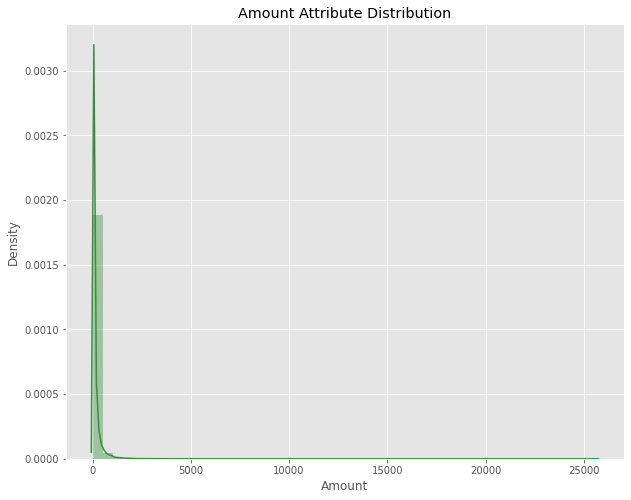

In [8]:
plt.figure(figsize=(10,8))
plt.title('Amount Attribute Distribution')
sns.distplot(df.Amount,color='#388E3C')

In [9]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

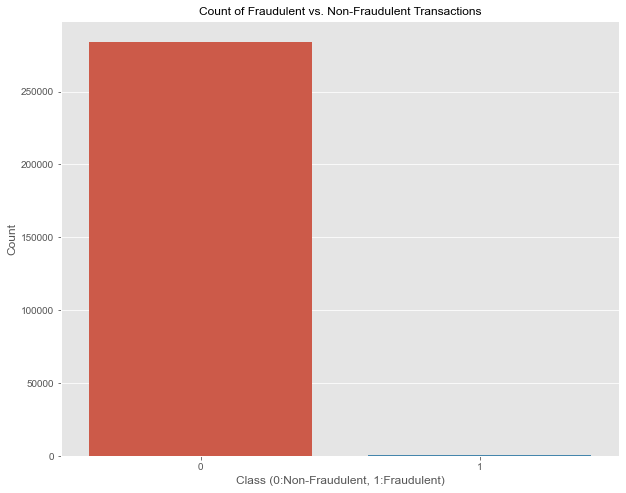

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(counts))
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Heatmap of Correlation')

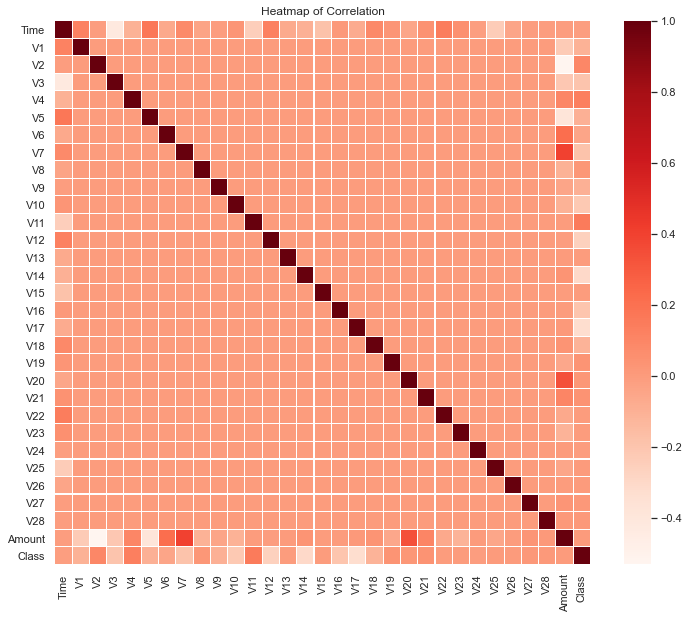

In [11]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.title('Heatmap of Correlation')

## Log10 of  Amount and Time, instead of Scaling

### as per our discussuion, tried the log10 of Amount and Time features instead of scaling 

In [6]:
def safe_log10(X):
    resulted_log10=[]
    for x in X:
        if x <= 0:
            resulted_log10.append(0.0)
        else:
            resulted_log10.append(np.log10(x))
            
        
    return resulted_log10

In [7]:
Log10_time = safe_log10(df['Time'].tolist())

In [8]:
df['Log10_Time']=Log10_time

C:\Users\homay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Log10_Time Attribute'}, xlabel='Log10_Time', ylabel='Density'>

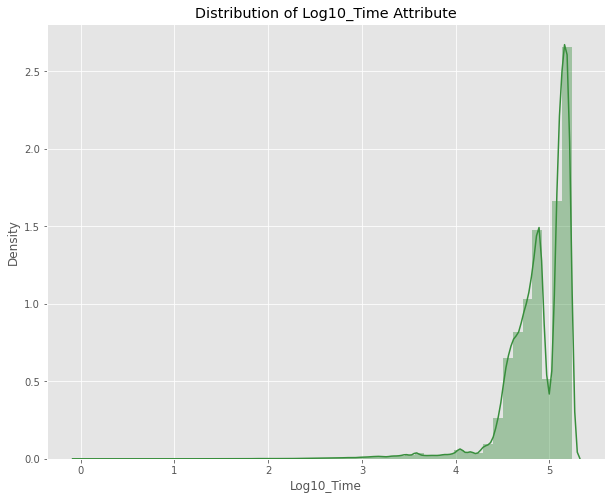

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Log10_Time Attribute')
sns.distplot(df['Log10_Time'], hist=True,color='#388E3C')

In [10]:
Log10_Amount = safe_log10(df['Amount'].tolist())

In [11]:
df['Log10_Amount']=Log10_Amount

C:\Users\homay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Log10_Amount Attribute'}, xlabel='Log10_Amount', ylabel='Density'>

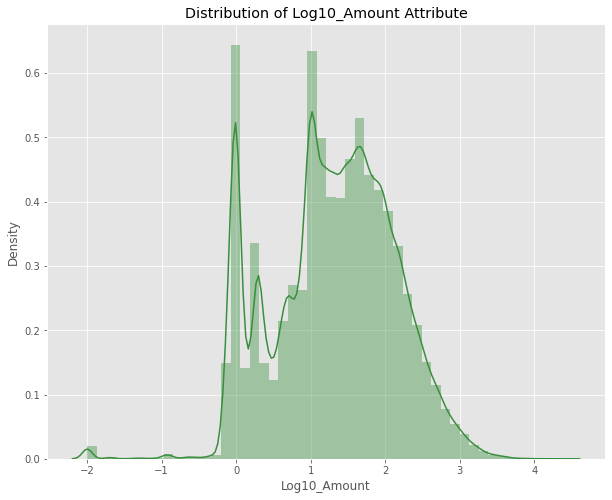

In [12]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Log10_Amount Attribute')
sns.distplot(df['Log10_Amount'], hist=True,color='#388E3C')

In [20]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

In [61]:
y

4920      1
6108      1
6329      1
6331      1
6334      1
         ..
183659    0
131185    0
173862    0
158153    0
252659    0
Name: Class, Length: 830, dtype: int64

### Random Undersampling

The present dataset is highly imbalanced with the fraud cases forming an extremely small percentage of the whole. This poses a problem in training the algorithms. To deal with this problem, the technique of random undersampling - removal of samples from majority class, is used. 

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

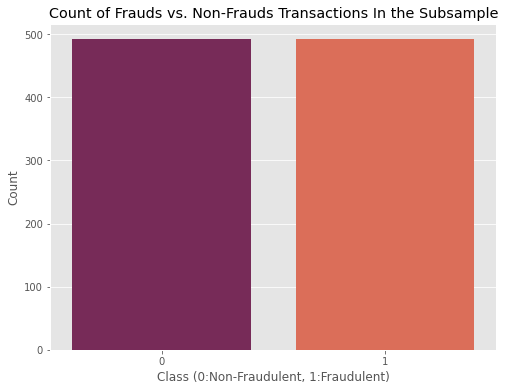

In [39]:

# undersampling with 1:1 ratio of legal and fraud transactions

frauds_Nu = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,frauds_Nu, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]



new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts ,palette="rocket")
plt.title('Count of Frauds vs. Non-Frauds Transactions In the Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [98]:
len(under_sample)


984

### Outlier Detection and Removal

Here, features with high negative correlation and high positive correlation are identified. We then remove the outliers that lies outside 2.5 times the IQR in an attempt to eliminate the effect of outliers.

In [22]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [23]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.567199
V9,-0.563596
V10,-0.624716
V12,-0.680864
V14,-0.749412
V16,-0.595771
V17,-0.561708


In [24]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.721245
V11,0.682888
Class,1.000000


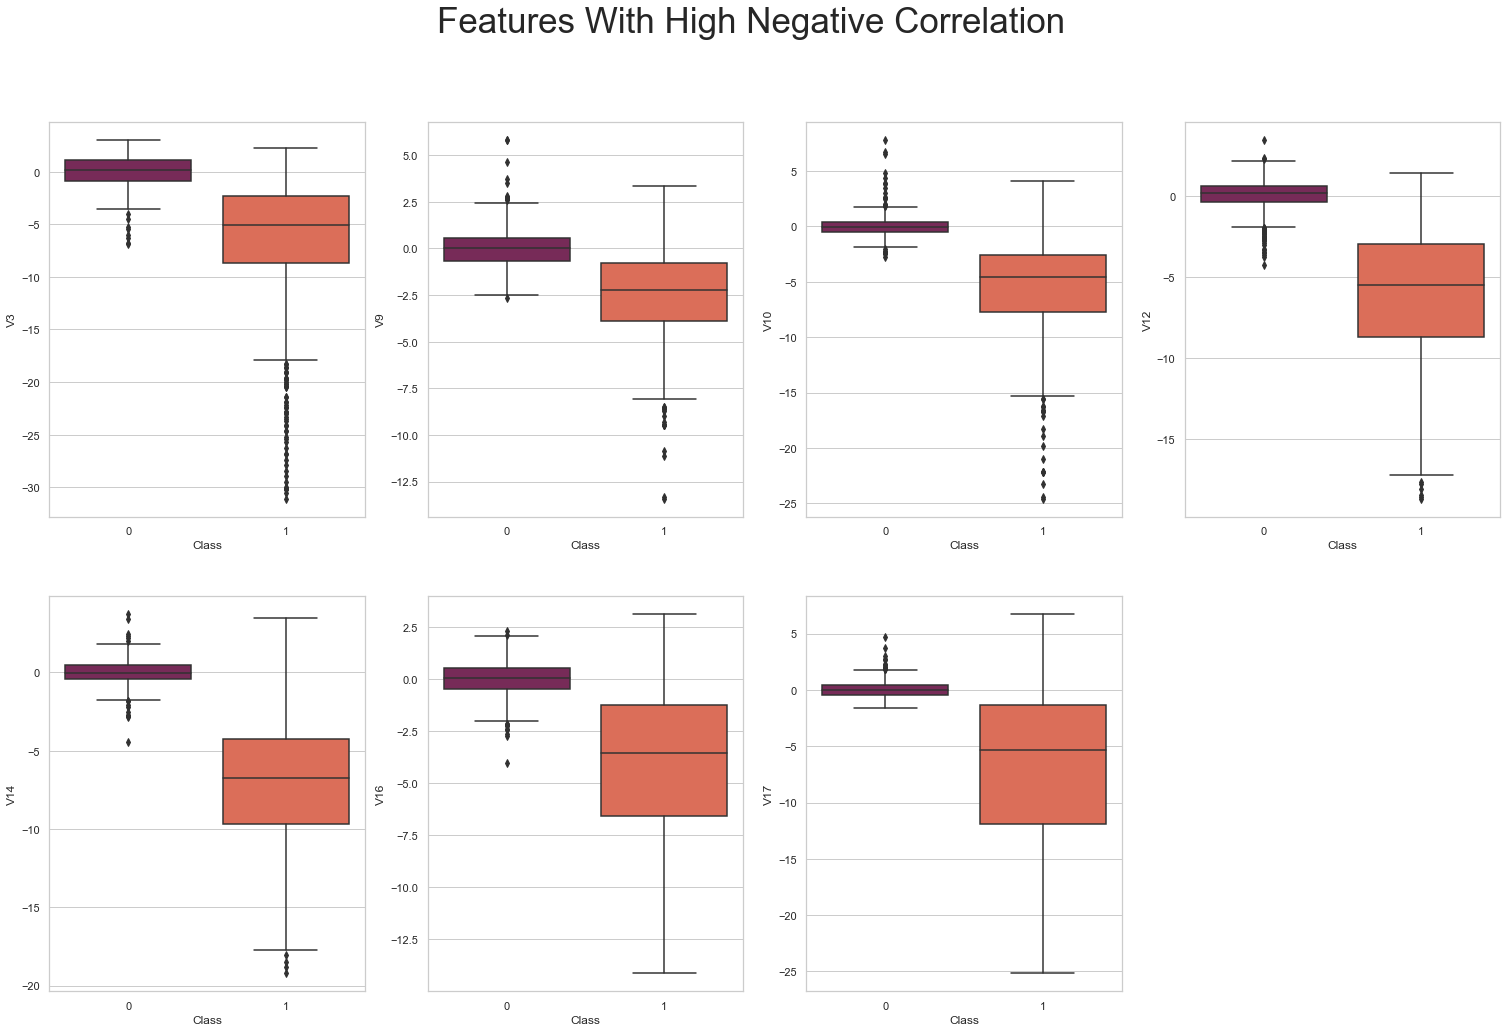

In [25]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample, palette="rocket", ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample, palette="rocket", ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample, palette="rocket" ,ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample, palette="rocket", ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample, palette="rocket", ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample, palette="rocket", ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample, palette="rocket", ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

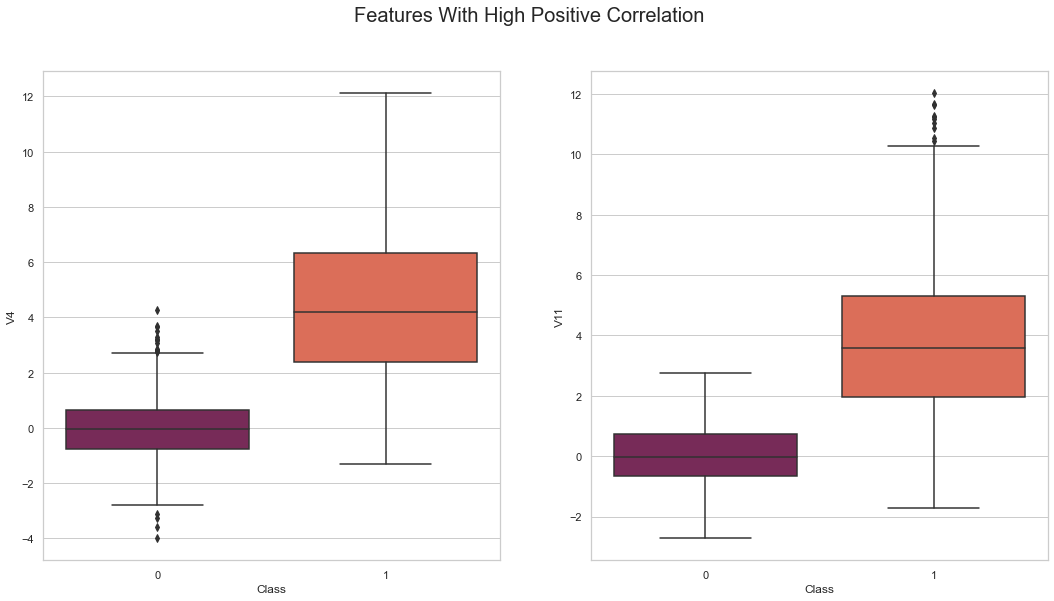

In [26]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample,palette="rocket",ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample,palette="rocket",ax=axes[1])

In [40]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 4 * IQR)) |(under_sample > (Q3 + 4 * IQR))).any(axis=1)]



In [41]:
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Log10_Time,Log10_Amount
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.649530,2.380085
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,3.844229,1.770852
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,3.876160,0.000000
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1,3.876564,0.000000
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1,3.877083,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225591,2.199047,-1.821826,-0.175704,-1.665512,-1.775547,0.315741,-1.986455,0.262901,-0.607081,1.659510,...,0.058760,0.251025,-0.859579,-0.537140,-0.212500,0.055404,-0.047340,0,5.159299,1.476397
8304,-1.085383,0.507854,0.904237,-1.156567,0.876260,0.263153,0.130753,0.170491,2.246222,-0.766036,...,-0.304902,-0.297577,-1.333377,-0.066861,0.974165,0.224810,0.285037,0,4.044775,0.204120
264866,-4.593414,4.476370,-3.664740,-1.040246,-1.657097,-0.991106,-1.458040,2.725615,1.137136,2.255989,...,1.011532,0.397845,0.657595,-0.092451,-0.198098,0.998944,0.666975,0,5.208530,0.252853
245705,-2.080475,-1.172135,0.510592,-1.789195,0.287009,0.234961,0.475441,0.513670,-1.778934,-0.639428,...,-2.293592,0.387370,-1.468056,0.387578,0.140088,-0.213455,-0.179330,0,5.184319,2.403892


In [42]:
len_after = len(df2)
len_before = len(under_sample)
len_difference = len(under_sample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'
      .format(len_before, len_difference, len_after))

We reduced our data size from 984 transactions by 153 transactions to 831 transactions.


In [43]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Splitting the data to evaluate performance

After removing extreme outliers, the dataset is now split into training set and testing set for further processes.

In [44]:
X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_test, y_under_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
#X_under_train, y_under_train

In [45]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Log10_Time,Log10_Amount
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.649530,2.380085
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,3.844229,1.770852
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,3.876160,0.000000
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,3.876564,0.000000
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,3.877083,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225591,2.199047,-1.821826,-0.175704,-1.665512,-1.775547,0.315741,-1.986455,0.262901,-0.607081,1.659510,...,-0.137920,0.058760,0.251025,-0.859579,-0.537140,-0.212500,0.055404,-0.047340,5.159299,1.476397
8304,-1.085383,0.507854,0.904237,-1.156567,0.876260,0.263153,0.130753,0.170491,2.246222,-0.766036,...,-0.304590,-0.304902,-0.297577,-1.333377,-0.066861,0.974165,0.224810,0.285037,4.044775,0.204120
264866,-4.593414,4.476370,-3.664740,-1.040246,-1.657097,-0.991106,-1.458040,2.725615,1.137136,2.255989,...,0.318541,1.011532,0.397845,0.657595,-0.092451,-0.198098,0.998944,0.666975,5.208530,0.252853
245705,-2.080475,-1.172135,0.510592,-1.789195,0.287009,0.234961,0.475441,0.513670,-1.778934,-0.639428,...,-0.617697,-2.293592,0.387370,-1.468056,0.387578,0.140088,-0.213455,-0.179330,5.184319,2.403892


## Classification Algorithms

### Parameter Tuning

Three algorithms - Logistic Regression, Support Vector Machine and Random Forest are used to solve the problem. A comparative study is then followed by evaluating each algorithm with respect to selected performance metrics.
Simple logistic regression is used. For the parameters of Support Vector Machine and Random Forest, Grid Search technique is employed to tune the parameters.

In [24]:
#importing relevant packages

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score



In [156]:
# paramter tuning for Support Vector Machine

def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_svm = svc_param_selection(X_train,y_train)

print(best_params_svm)



{'C': 10, 'gamma': 0.01}


In [16]:
best_params_svm={'C': 10, 'gamma': 0.01}

In [33]:
# parameter tuning for Random Forest

def rf_param_selection(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = rf_param_selection(X_train,y_train)

print(best_params)



{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [17]:
best_params = {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}

### Evaluating Algorithms

The evaluation and comparison of algorithms is performed using K-fold cross validation. F1 score and ROC-AUC are used as performance metrics. The mean of each parameter across the k sets is displayed.

In [27]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

In [65]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## what i have updated:
### 1) designed a function to calculte the AUPRC
### 2) since the cross_val_score had no AUPRC feature, I added a loop to derived the AUPRC for each fold
### 3) updated the plots with the AUPRC measure

In [19]:
def AUPRC_calculation (X_train, y_train,X_test,y_test,model):
    model.fit(X_train, y_train)
    # Get the predicited probability of testing data
    y_score = model.predict_proba(X_test)[:, 1]
    # Average precision score
    average_precision = average_precision_score(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    auc_precision_recall = auc(recall, precision)
    return auc_precision_recall

In [46]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    #results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    PR_auc=[]
    for train_index, test_index in kfold.split(X_under_train):
        X_train, X_test = X_under_train.iloc[train_index], X_under_train.iloc[test_index]
        y_train, y_test = y_under_train.iloc[train_index], y_under_train.iloc[test_index]
        if AUPRC_calculation (X_train, y_train,X_test,y_test,model) > 0.0:
            PR_auc.append(AUPRC_calculation (X_train, y_train,X_test,y_test,model) )
        #y_test 
        #print(train_index, test_index)
    print('PR-AUC:',np.array(PR_auc).mean())
    results.append(np.array(PR_auc))
    
    
    print('\n')

Logistic Regression:

F1 Score: 0.9255887882413998
ROC-AUC: 0.9732017101995798
PR-AUC: 0.9723266285219447


Support Vector Machine:

F1 Score: 0.9422735029447115
ROC-AUC: 0.97391445559619
PR-AUC: 0.9748342610524935


Random Forest:

F1 Score: 0.9189453551614235
ROC-AUC: 0.9666265446123573
PR-AUC: 0.9681867327534531




In [121]:
PR_auc

[0.9741952580490191,
 0.9875168234543235,
 0.9385898806696807,
 0.9769433837494452,
 0.9839939490596197,
 0.9420942169422538,
 0.9852467427201628,
 0.9082960441224179,
 0.9936418789762149,
 0.9799176242083079]

In [40]:
models

[('Logistic Regression', LogisticRegression()),
 ('Support Vector Machine', SVC(C=10, gamma=0.01)),
 ('Random Forest',
  RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
                         min_samples_split=12))]

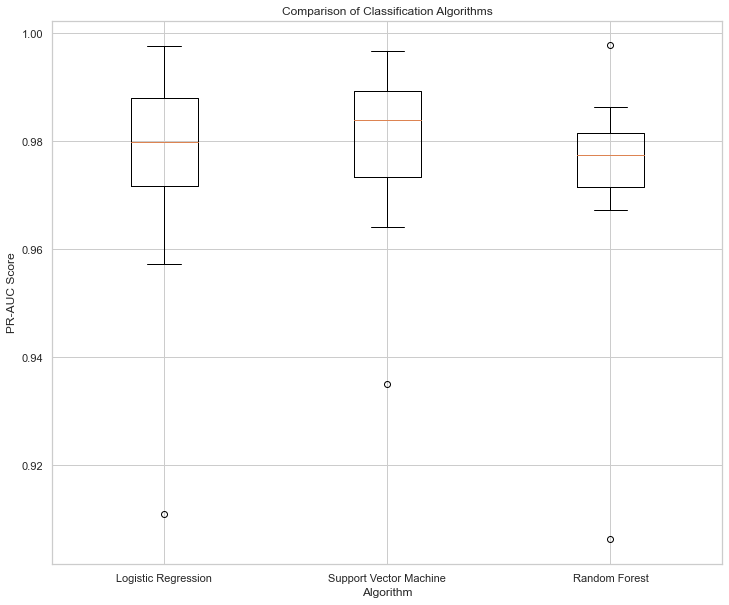

In [159]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('PR-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### Using different Undersampling Ratios for evaluating performance

The technique of undersampling is used for handling the problem of imbalanced dataset. We previously evaluated the algorithms on 1:1 undersampling ratio dataset. Now we model the dataset with the real-world scenario, where the percentage of fraud is usually small. We now observe the performance of each algorithm with different undersampling ratios - 15%, 10%, 5% and 2%. Each time we remove the extreme outliers as before and then evaluate the performance with K-fold cross validation.

### 15% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

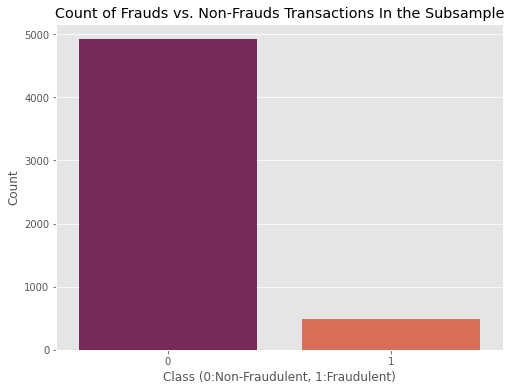

In [47]:
# 15% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts,palette="rocket")
plt.title('Count of Frauds vs. Non-Frauds Transactions In the Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')




#### Comparison of the various algorithms

In [48]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 4 * IQR)) |(under_sample > (Q3 + 4 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [49]:
X_under_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Log10_Time,Log10_Amount
258195,0.038996,0.897136,0.302642,-0.598355,0.478863,-1.028382,1.030363,-0.208862,-0.117990,-0.433150,...,-0.249800,-0.508514,0.068662,-0.007015,-0.488606,0.141839,0.253785,0.097770,5.200136,0.411620
147634,-0.563441,0.895764,1.668067,0.912393,-0.168227,0.048543,0.447442,-0.780655,1.324519,1.546482,...,0.198324,1.422555,-0.315424,0.120376,-0.602396,0.112200,-0.556882,-0.285881,4.948281,0.661813
69758,1.467573,-0.409918,-0.445880,-0.694890,-0.561202,-1.095598,-0.092158,-0.291011,-0.930984,0.772629,...,-0.462320,-0.913033,-0.052365,-0.143276,0.459583,1.110043,-0.098669,-0.012696,4.728930,0.954243
269266,2.204249,-1.527496,-0.915959,-1.766346,-0.995807,0.201936,-1.323871,0.020257,-1.404363,1.668616,...,-0.092242,0.167969,0.194359,0.223927,-0.233208,-0.202759,0.019612,-0.045096,5.213812,1.690196
102484,1.161249,0.136713,0.347882,1.080040,-0.501079,-0.802002,0.002257,0.009913,0.007228,0.235836,...,0.077470,0.107910,-0.073587,0.494469,0.558718,-0.353205,-0.005135,0.010198,4.833950,1.229938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197008,-0.349926,0.203435,-2.202406,-3.954771,2.623100,2.572615,0.179774,0.971193,-1.450349,-0.638877,...,-0.128561,-0.070898,-0.183469,0.735003,-0.025042,0.347750,-0.002181,0.069857,5.119915,0.089905
202234,1.891791,-1.503085,-0.491290,-0.679490,-1.580169,-0.842999,-0.984041,-0.107069,0.297659,0.742507,...,0.468191,1.032788,0.029336,0.058461,-0.295344,-0.079380,-0.017766,-0.022913,5.127856,2.176091
241255,-0.831535,1.156090,-0.667533,-0.624898,0.937622,-1.739739,1.381195,-0.185524,-0.778073,-0.927221,...,0.309479,0.924602,-0.183878,0.102373,0.489743,-0.306037,-0.099435,0.047090,5.178833,1.071882
242210,-1.050742,0.326024,0.116671,-0.265197,0.784429,-1.360195,0.442044,0.261377,-0.327086,-0.896240,...,-0.047029,-0.467551,-0.029641,-0.117152,-0.446042,0.021054,-0.005806,-0.012407,5.180109,0.930440


In [50]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Log10_Time,Log10_Amount
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.649530,2.380085
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,3.844229,1.770852
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,3.876160,0.000000
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,3.876564,0.000000
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,3.877083,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98963,0.911434,-0.095955,-0.417096,1.111959,0.280069,-0.131790,0.552772,-0.067160,-0.559378,0.163169,...,0.150115,0.120485,-0.298802,-0.288300,0.720738,-0.263533,-0.028167,0.020453,4.825407,2.193125
144638,1.178515,0.407378,0.666197,2.063906,0.254806,0.858825,-0.293667,0.186477,-0.786339,0.776132,...,-0.091593,-0.322161,-0.108061,-1.037604,0.386171,-0.085696,0.017437,0.017385,4.935940,1.299943
236508,-1.157815,0.731577,1.521384,-0.944872,0.141823,0.827827,0.217251,0.498365,0.111262,-0.939209,...,0.276910,0.877768,-0.529471,0.262238,0.782294,-0.082563,-0.343995,-0.244692,5.172723,1.643551
280112,-0.694553,-0.121232,1.250017,-2.567893,0.535551,-0.699039,0.982177,-0.543787,-1.263973,0.443649,...,0.369095,1.159787,-0.668687,-0.309051,1.000464,0.053084,-0.491860,-0.416989,5.228724,1.554489


In [51]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    #results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    PR_auc=[]
    for train_index, test_index in kfold.split(X_under_train):
        X_train, X_test = X_under_train.iloc[train_index], X_under_train.iloc[test_index]
        y_train, y_test = y_under_train.iloc[train_index], y_under_train.iloc[test_index]
        if AUPRC_calculation (X_train, y_train,X_test,y_test,model) > 0.0:
            PR_auc.append(AUPRC_calculation (X_train, y_train,X_test,y_test,model) )
        #y_test 
        #print(train_index, test_index)
    print('PR-AUC:',np.array(PR_auc).mean())
    results.append(np.array(PR_auc))
    
    
    print('\n')

Logistic Regression:

F1 Score: 0.9405746437143184
ROC-AUC: 0.9733924635285911
PR-AUC: 0.919701830140639


Support Vector Machine:

F1 Score: 0.94457305768783
ROC-AUC: 0.9644506188758223
PR-AUC: 0.9075738422907648


Random Forest:

F1 Score: 0.9454391852965104
ROC-AUC: 0.9696831746623905
PR-AUC: 0.9094619240444587




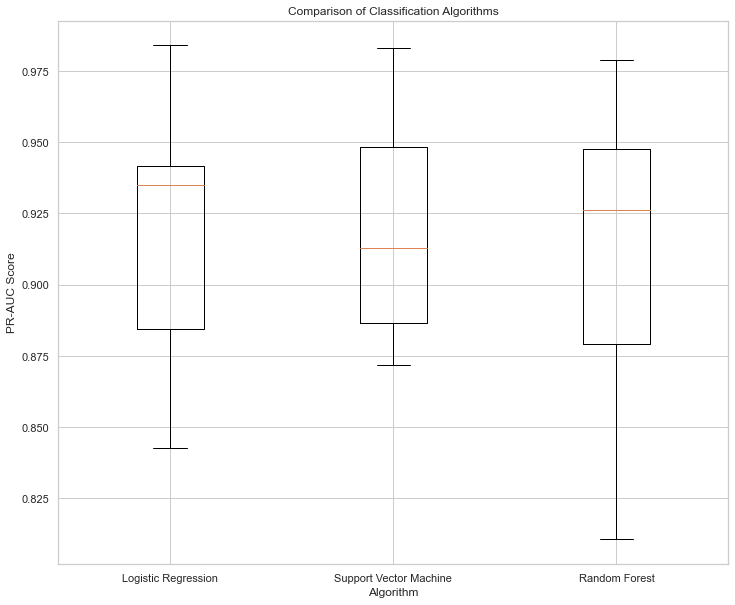

In [165]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('PR-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### 10% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

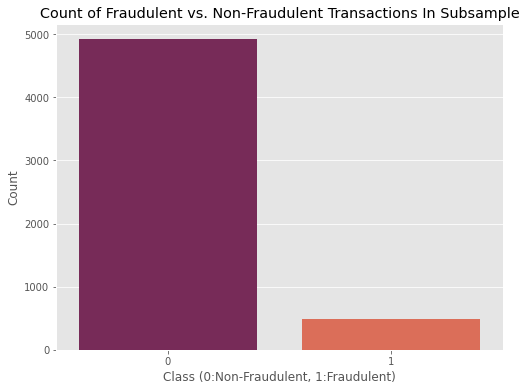

In [52]:
# 10% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts,palette="rocket")
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [53]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 4 * IQR)) |(under_sample > (Q3 + 4 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [54]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    #results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    PR_auc=[]
    for train_index, test_index in kfold.split(X_under_train):
        X_train, X_test = X_under_train.iloc[train_index], X_under_train.iloc[test_index]
        y_train, y_test = y_under_train.iloc[train_index], y_under_train.iloc[test_index]
        if AUPRC_calculation (X_train, y_train,X_test,y_test,model) > 0.0:
            PR_auc.append(AUPRC_calculation (X_train, y_train,X_test,y_test,model) )
        #y_test 
        #print(train_index, test_index)
    print('PR-AUC:',np.array(PR_auc).mean())
    results.append(np.array(PR_auc))
    
    
    print('\n')

Logistic Regression:

F1 Score: 0.9429616491155178
ROC-AUC: 0.9713003504307245
PR-AUC: 0.9210817834910034


Support Vector Machine:

F1 Score: 0.9488221998787774
ROC-AUC: 0.9611242975177078
PR-AUC: 0.9040017049259609


Random Forest:

F1 Score: 0.9496962127621501
ROC-AUC: 0.9674396736904795
PR-AUC: 0.9123582594257872




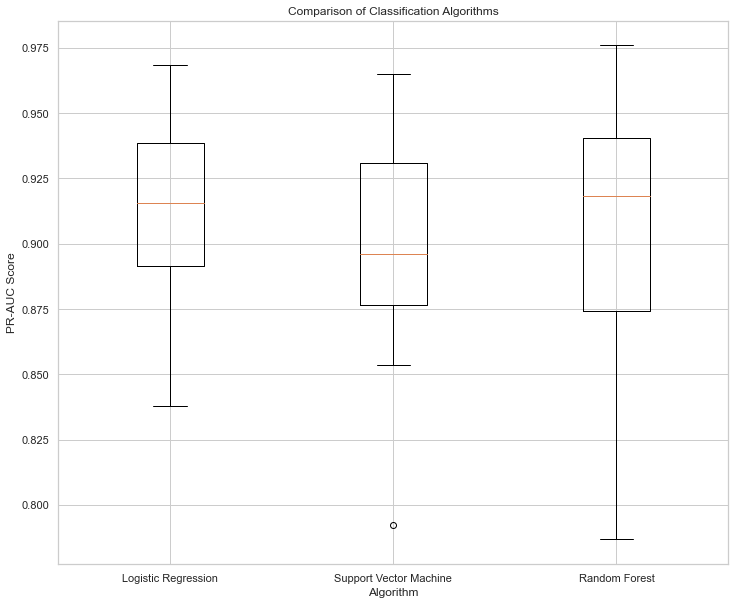

In [136]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('PR-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### 5% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

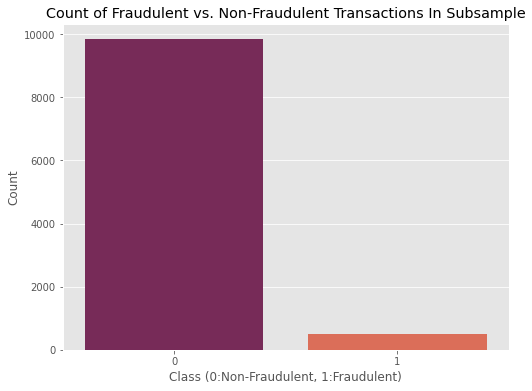

In [55]:
# 5% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.05), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts,palette="rocket")
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [56]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 4 * IQR)) |(under_sample > (Q3 + 4 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [57]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    #results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    PR_auc=[]
    for train_index, test_index in kfold.split(X_under_train):
        X_train, X_test = X_under_train.iloc[train_index], X_under_train.iloc[test_index]
        y_train, y_test = y_under_train.iloc[train_index], y_under_train.iloc[test_index]
        if AUPRC_calculation (X_train, y_train,X_test,y_test,model) > 0.0:
            PR_auc.append(AUPRC_calculation (X_train, y_train,X_test,y_test,model) )
        #y_test 
        #print(train_index, test_index)
    print('PR-AUC:',np.array(PR_auc).mean())
    results.append(np.array(PR_auc))
    
    
    print('\n')

Logistic Regression:

F1 Score: 0.9391874747096729
ROC-AUC: 0.9807696872110728
PR-AUC: 0.894069424360165


Support Vector Machine:

F1 Score: 0.9451837999446193
ROC-AUC: 0.9689132288725067
PR-AUC: 0.9046273749435603


Random Forest:

F1 Score: 0.9445767636717243
ROC-AUC: 0.9680827980043427
PR-AUC: 0.8877968406905932




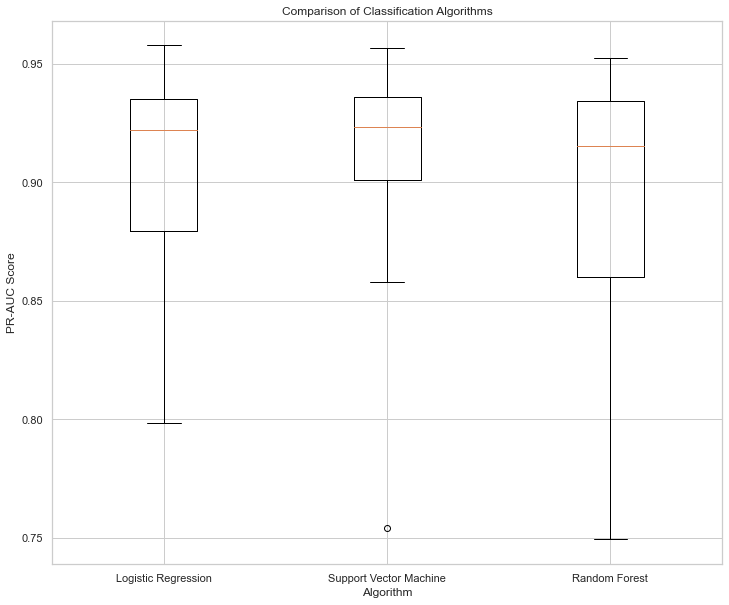

In [140]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('PR-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## 2% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

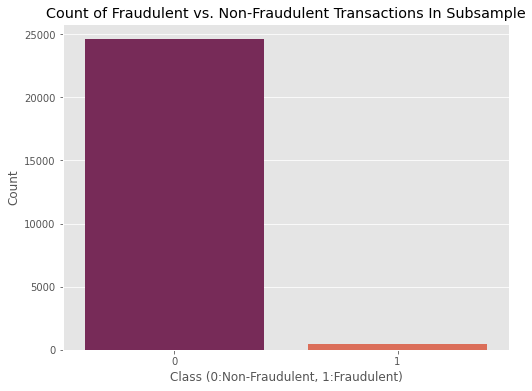

In [58]:
# 5% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.02), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts,palette="rocket")
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [59]:
# removing extreme outliers
#Q1 = under_sample.quantile(0.25)
#Q3 = under_sample.quantile(0.75)
#IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 4 * IQR)) |(under_sample > (Q3 + 4 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']


from sklearn.model_selection import train_test_split
# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    #results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    PR_auc=[]
    for train_index, test_index in kfold.split(X_under_train):
        X_train, X_test = X_under_train.iloc[train_index], X_under_train.iloc[test_index]
        y_train, y_test = y_under_train.iloc[train_index], y_under_train.iloc[test_index]
        if AUPRC_calculation (X_train, y_train,X_test,y_test,model) > 0.0:
            PR_auc.append(AUPRC_calculation (X_train, y_train,X_test,y_test,model) )
        #y_test 
        #print(train_index, test_index)
    print('PR-AUC:',np.array(PR_auc).mean())
    results.append(np.array(PR_auc))
    
    
    print('\n')

Logistic Regression:

F1 Score: 0.9411110761142669
ROC-AUC: 0.9746566359737047
PR-AUC: 0.8823696978976544


Support Vector Machine:

F1 Score: 0.9478381881338624
ROC-AUC: 0.9482196077343861
PR-AUC: 0.8771454438764709


Random Forest:

F1 Score: 0.9480481850268079
ROC-AUC: 0.9604560188670513
PR-AUC: 0.8758703056820225




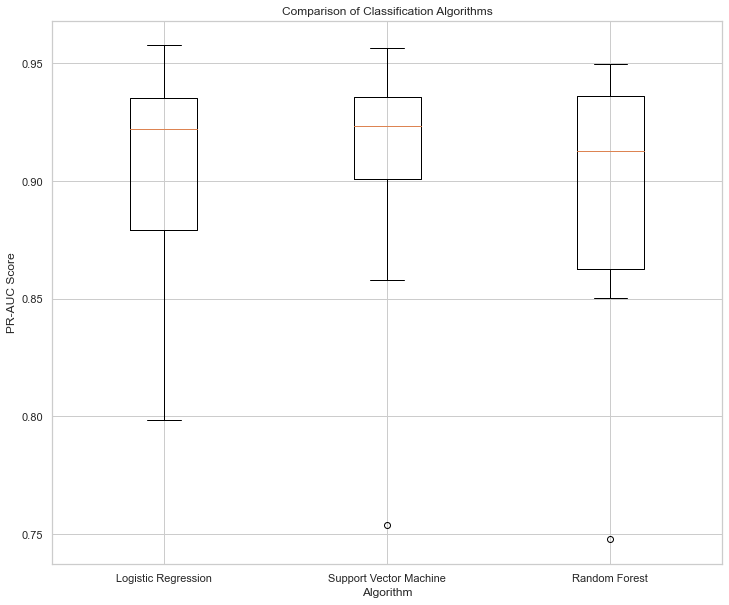

In [148]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('PR-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## Conclusion


All the method performed relatively well, but Logistic Regression and Random Forest performed better on scenarios where under-sampling ratio resemble actual realities. 

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [63]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

In [172]:
models[:][1]

('Support Vector Machine', SVC(C=10, gamma=0.01, probability=True))

In [173]:
models

[('Logistic Regression', LogisticRegression()),
 ('Support Vector Machine', SVC(C=10, gamma=0.01, probability=True)),
 ('Random Forest',
  RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
                         min_samples_split=12))]

In [71]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.02)), ('model', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.997


In [65]:
steps = [('under', RandomUnderSampler()), ('model', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.416


In [68]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.02)), ('model', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.814


In [74]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.2)), ('model', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.759


In [75]:
steps = [('under', RandomUnderSampler(0.2)), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.629


In [190]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'],probability=True)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    rkfold = RepeatedStratifiedKFold(n_splits=10)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_results_roc = cross_val_score(model,  X_under_train, y_under_train, cv=cv, scoring='roc_auc')
    cv_results_f = cross_val_score(model,  X_under_train, y_under_train, cv=cv, scoring='f1_macro')
    #results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    PR_auc=[]
    '''
    for train_index, test_index in rkfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        if AUPRC_calculation (X_train, y_train,X_test,y_test,model) > 0.0:
            PR_auc.append(AUPRC_calculation (X_train, y_train,X_test,y_test,model) )
        #y_test 
        #print(train_index, test_index)
    print('PR-AUC:',np.array(PR_auc).mean())
    results.append(np.array(PR_auc))
    '''
    
    print('\n')

Logistic Regression:

F1 Score: 0.9367985167904289
ROC-AUC: 0.9731299248952231


Support Vector Machine:

F1 Score: 0.9460087938463265
ROC-AUC: 0.9601836074301068


Random Forest:

F1 Score: 0.9392649618245634
ROC-AUC: 0.9657510693107806




In [188]:
rkfold.split(X)

<generator object _RepeatedSplits.split at 0x0000024ACF3A53C0>